In [53]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = "dataset/cleaned.csv"
df = pd.read_csv(filename)

In [4]:
df.head()


Age_band_of_driver Sex_of_driver   Educational_level  \
0              18-30          Male   Above high school   
1              31-50          Male  Junior high school   
2              18-30          Male  Junior high school   
3              18-30          Male  Junior high school   
4              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience   Lanes_or_Medians  \
0                Employee              1-2yr            Unknown   
1                Employee         Above 10yr  Undivided Two way   
2                Employee              1-2yr              other   
3                Employee             5-10yr              other   
4                Employee              2-5yr              other   

  Types_of_Junction Road_surface_type       Light_conditions  \
0       No junction     Asphalt roads               Daylight   
1       No junction     Asphalt roads               Daylight   
2       No junction     Asphalt roads               Daylight   
3           Y Shape       Earth roads  Darkness - lights lit   
4           Y Shape     Asphalt roads  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

  Vehicle_movement Pedestrian_movement           Cause_of_accident  \
0   Going straight    Not a Pedestrian             Moving Backward   
1   Going straight    Not a Pedestrian                  Overtaking   
2   Going straight    Not a Pedestrian   Changing lane to the left   
3   Going straight    Not a Pedestrian  Changing lane to the right   
4   Going straight    Not a Pedestrian                  Overtaking   

   Accident_severity  
0                  2  
1                  2  
2                  1  
3                  2  
4                  2

In [5]:
# calculate the correlation coefficient for every pair of numerical columns in the DataFrame
df.corr()

C:\Users\rolon\AppData\Local\Temp\ipykernel_10168\285613538.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Accident_severity
Accident_severity                1.0

In [6]:
print(df.columns.tolist())

['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine
Shape of your Data Set loaded: (12316, 15)
#######################################################################################
######################## C L A S S

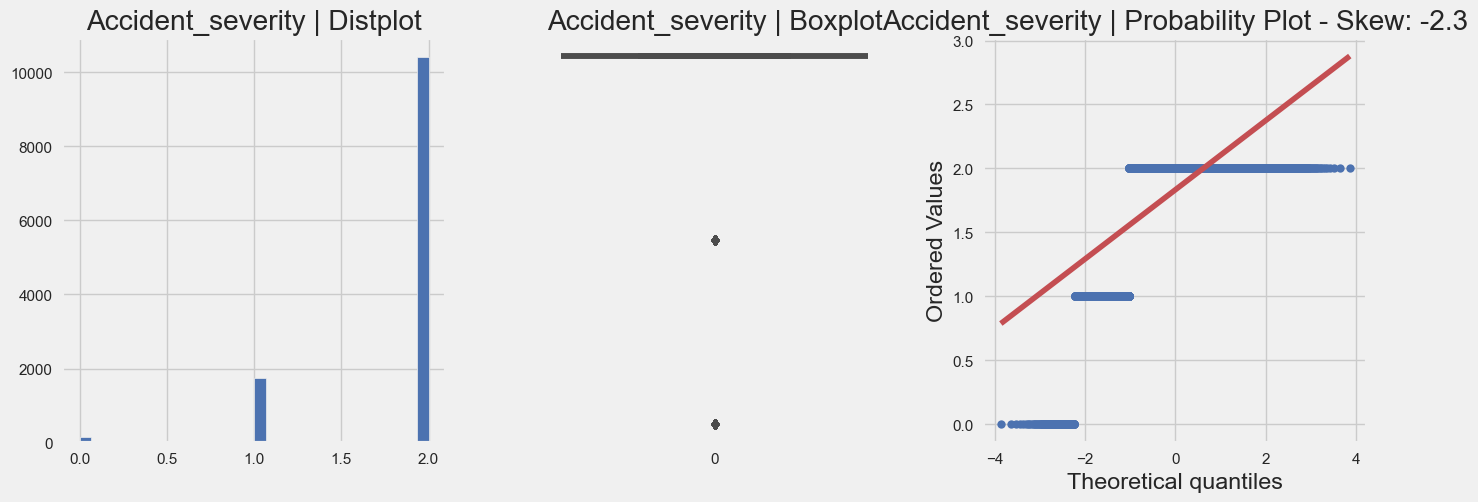

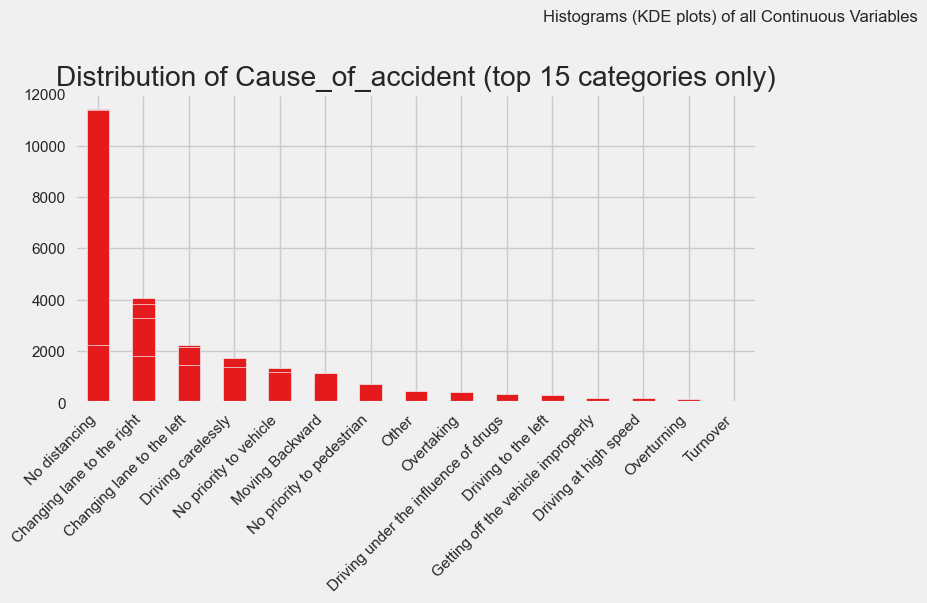

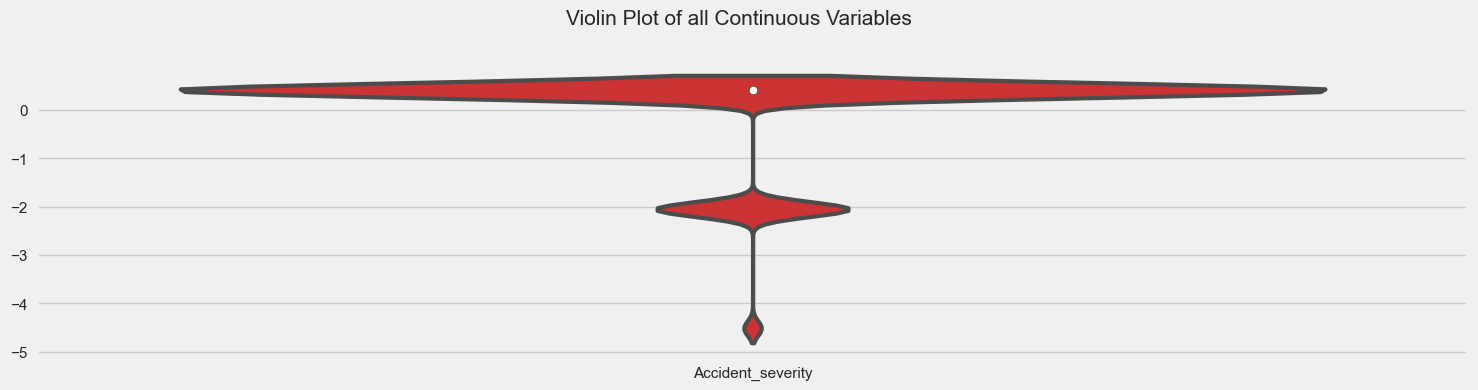

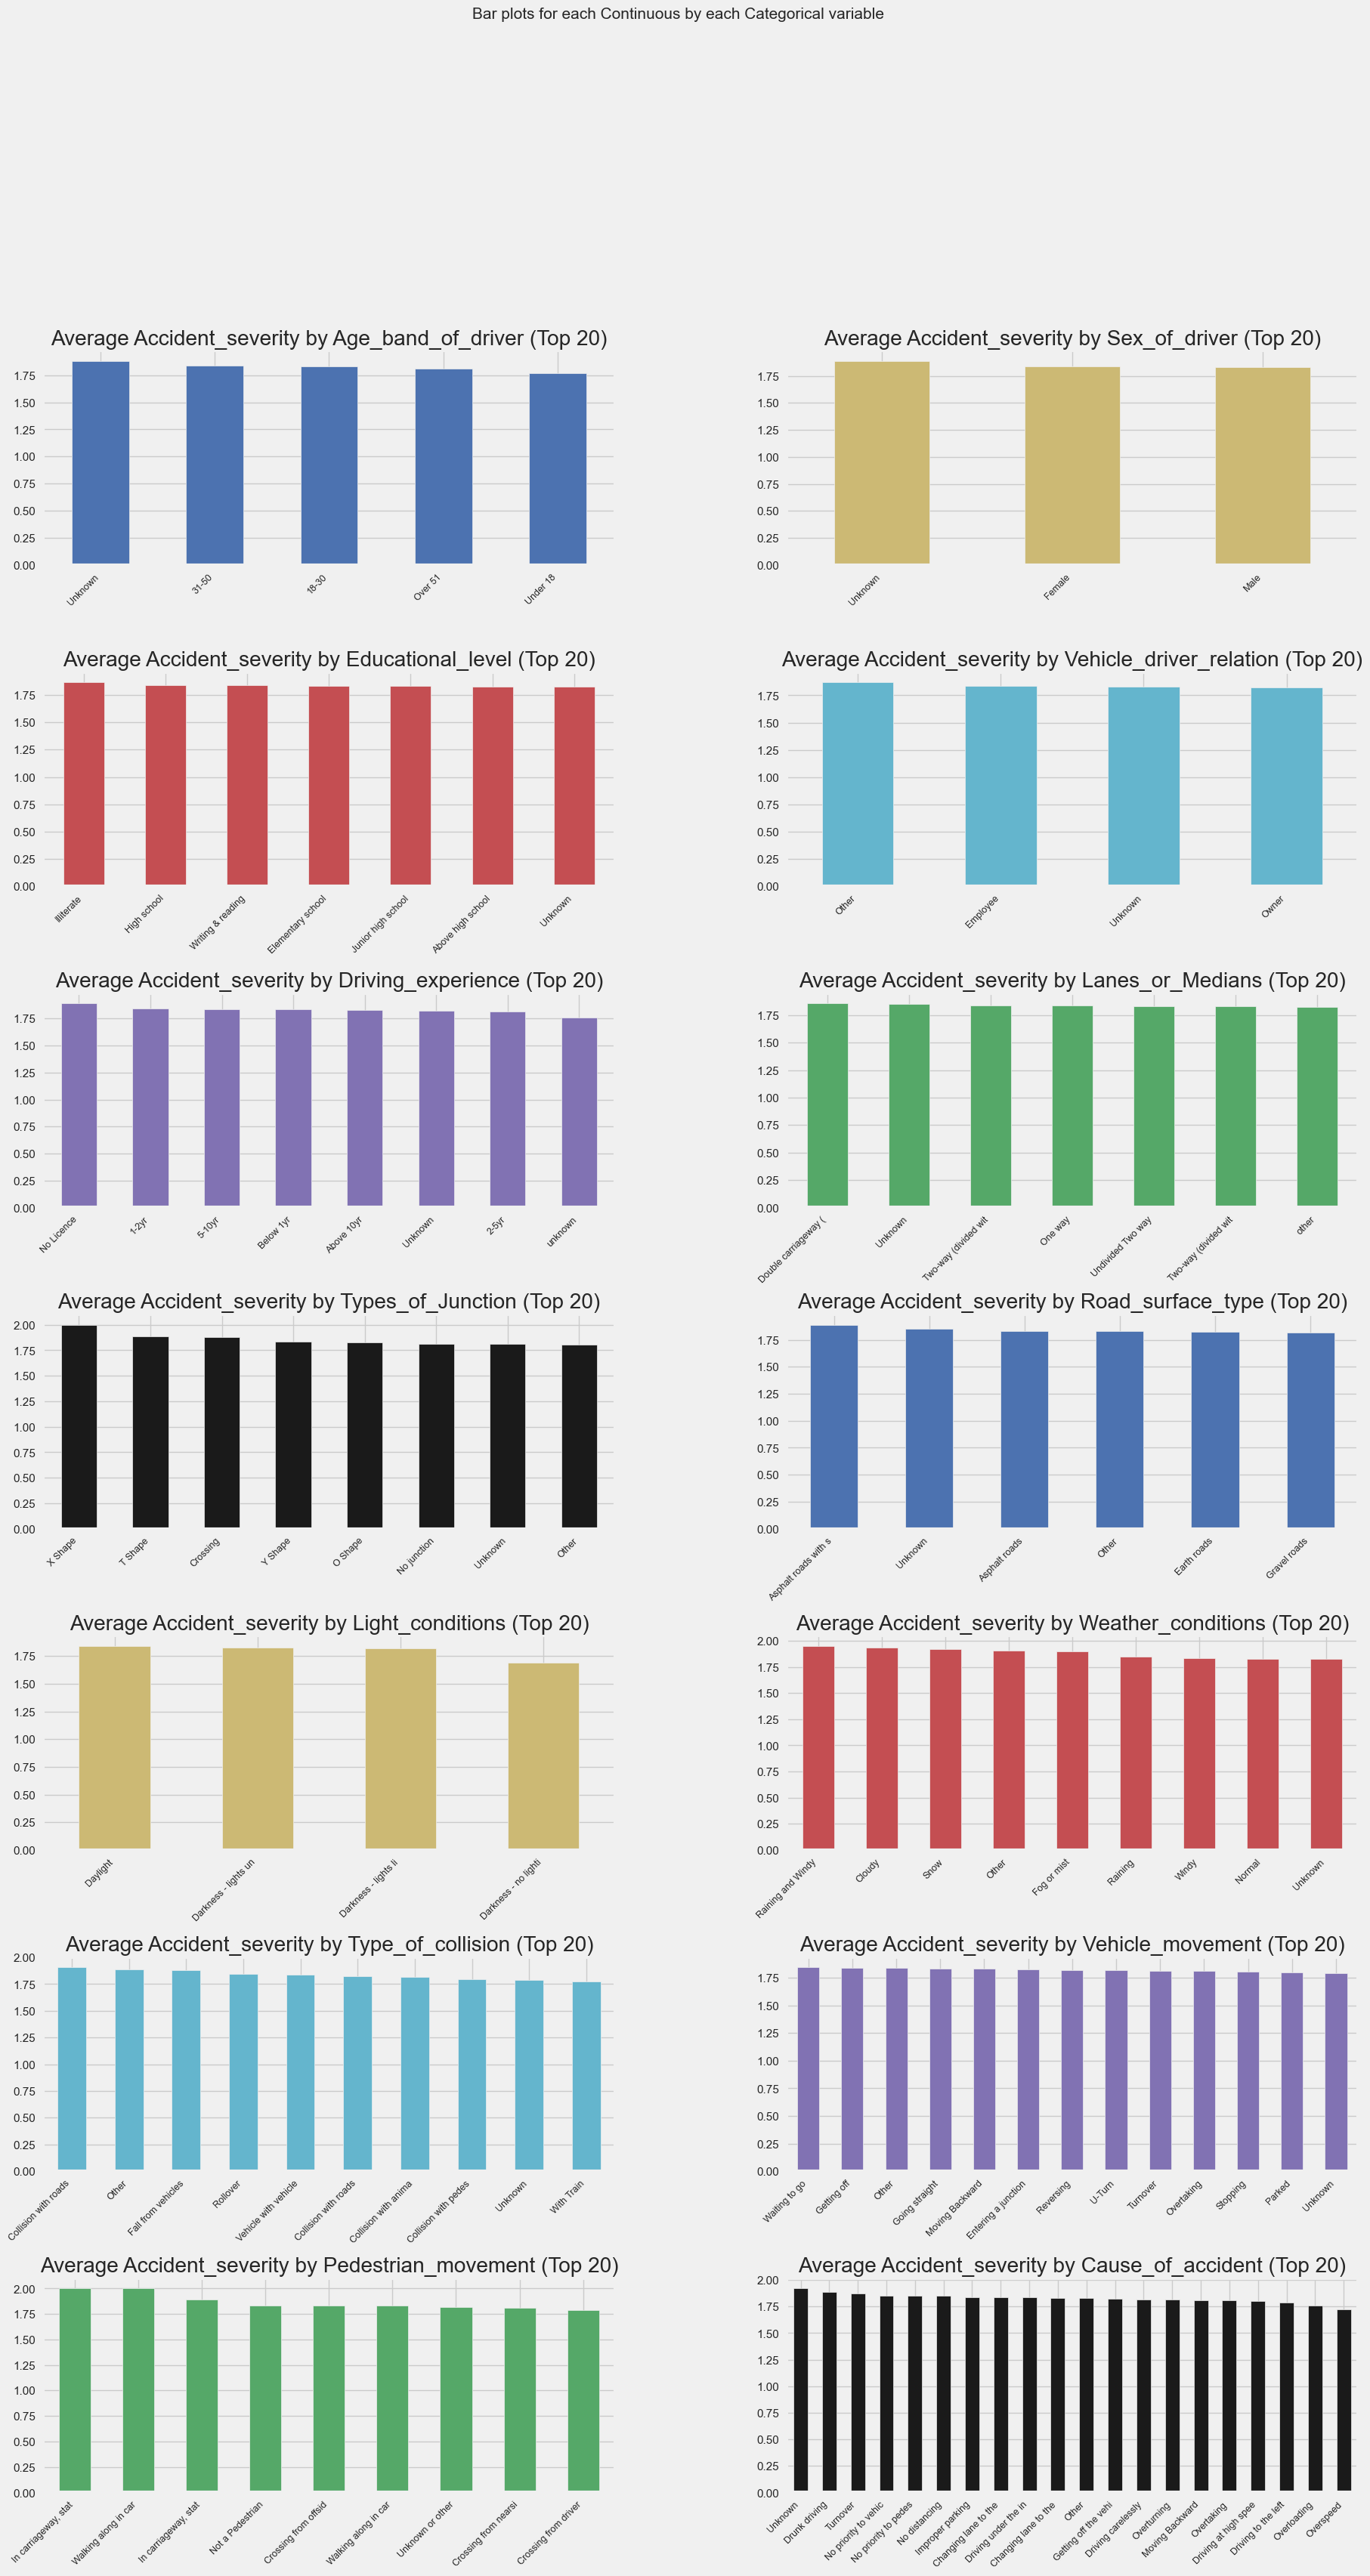

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [7]:
# autoviz library - Automatically Visualize any dataset, any size with a single line of code.
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

%matplotlib inline

dft = AV.AutoViz(
    filename="",                # give file name if no dfte(dataframe)
    sep=",",
    depVar="",                  # target variable (optional)
    dfte=df,                    # dataframe (empty if you use filename)
    header=0,                   # row number of the header
    verbose=0,                  # 0,1,2 (0 - all charts, less info; 1 - all charts, more info, 2 - all charts saved in folder)
    lowess=False,               # to see regression lines (don't use for large data sets,i., >100,000 rows))
    chart_format="svg",         # 'svg', 'png', 'jpg', 'bokeh', 'server', 'html' (bokeh - to get interactive charts in jupyter notebook, server - to get interactive charts in browser)
    max_rows_analyzed=15000,
    max_cols_analyzed=32,
    save_plot_dir=None           # directory to save plots in (None - default folder)
)


Text(0, 0.5, 'Driving_experience')

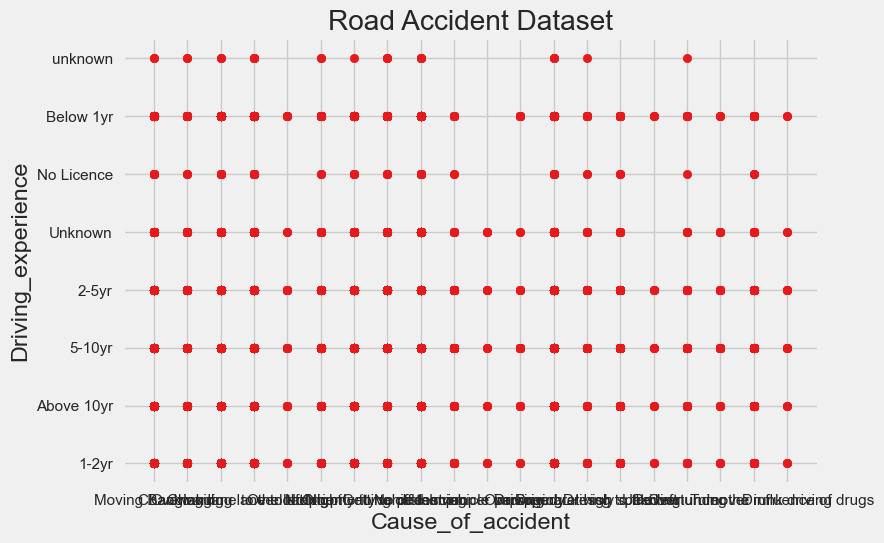

In [8]:
# MATPLOTLIB
# Scatter plot

# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['Cause_of_accident'], df['Driving_experience'])
# set a title and labels
ax.set_title('Road Accident Dataset')
ax.set_xlabel('Cause_of_accident')
ax.set_ylabel('Driving_experience')

Text(0, 0.5, 'Driving_experience')

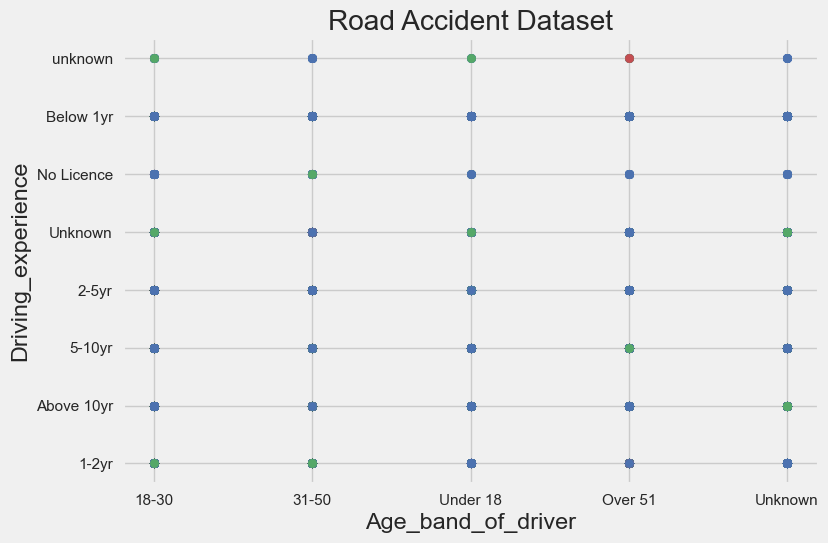

In [9]:

# create color dictionary based on accident severity
colors = {0: 'r', 1: 'g', 2: 'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(df['Age_band_of_driver'])):
    ax.scatter(df['Age_band_of_driver'][i], df['Driving_experience'][i], color=colors[df['Accident_severity'][i]])

# set a title and labels
ax.set_title('Road Accident Dataset')
ax.set_xlabel('Age_band_of_driver')
ax.set_ylabel('Driving_experience')


In [10]:
unique_weather_conditions = df['Weather_conditions'].unique()
print(unique_weather_conditions)

['Normal' 'Raining' 'Raining and Windy' 'Cloudy' 'Other' 'Windy' 'Snow'
 'Unknown' 'Fog or mist']


In [11]:
# count the number of each value in a column
counts = df['Weather_conditions'].value_counts()
print(counts)

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64


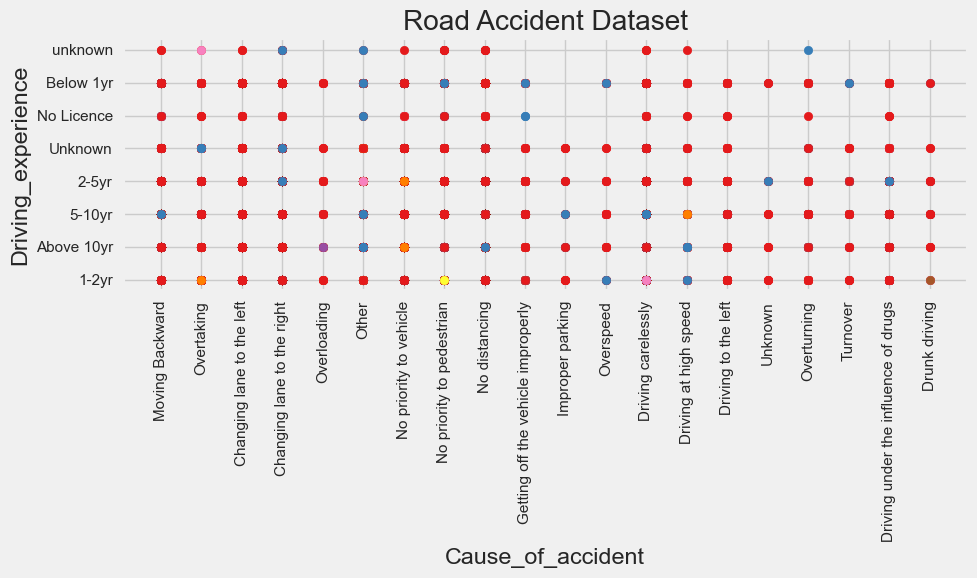

In [12]:
# create color dictionary based on accident severity
colors = {}
for i, wc in enumerate(unique_weather_conditions):
    colors[wc] = plt.cm.Set1(i)

# create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# plot each data-point
for i in range(len(df['Cause_of_accident'])):
    ax.scatter(df['Cause_of_accident'][i], df['Driving_experience'][i], color=colors[df['Weather_conditions'][i]])

# set a title and labels
ax.set_title('Road Accident Dataset')
ax.set_xlabel('Cause_of_accident')
ax.set_ylabel('Driving_experience')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.tight_layout()  # Adjust the plot layout to prevent overlapping of labels
plt.show()

In [13]:
df.dtypes

Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity           int64
dtype: object

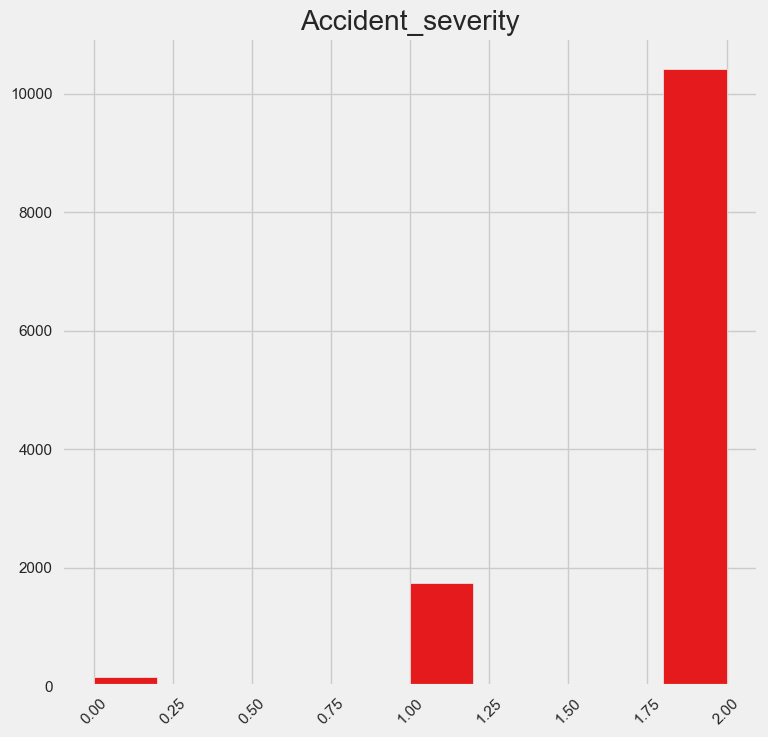

In [15]:
# histogram of all numerical values
df.hist(figsize=(8,8), xrot=45)
plt.show()


In [16]:
df.describe()

Accident_severity
count       12316.000000
mean            1.832819
std             0.406082
min             0.000000
25%             2.000000
50%             2.000000
75%             2.000000
max             2.000000

In [18]:
df.describe(include='object')

Age_band_of_driver Sex_of_driver   Educational_level  \
count               12316         12316               12316   
unique                  5             3                   7   
top                 18-30          Male  Junior high school   
freq                 4271         11437                7619   

       Vehicle_driver_relation Driving_experience  \
count                    12316              12316   
unique                       4                  8   
top                   Employee             5-10yr   
freq                      9627               3363   

                                        Lanes_or_Medians Types_of_Junction  \
count                                              12316             12316   
unique                                                 7                 8   
top     Two-way (divided with broken lines road marking)           Y Shape   
freq                                                4411              4543   

       Road_surface_type Light_conditions Weather_conditions  \
count              12316            12316              12316   
unique                 6                4                  9   
top        Asphalt roads         Daylight             Normal   
freq               11296             8798              10063   

                     Type_of_collision Vehicle_movement Pedestrian_movement  \
count                            12316            12316               12316   
unique                              10               13                   9   
top     Vehicle with vehicle collision   Going straight    Not a Pedestrian   
freq                              8774             8158               11390   

       Cause_of_accident  
count              12316  
unique                20  
top        No distancing  
freq                2263

In [44]:
# create a new column 'age_group'
"""
unique_age_band = df['Age_band_of_driver'].unique()
mapping = {string: i+1 for i, string in enumerate(sorted(unique_age_band))}
print(mapping)

df['age_group'] = df['Age_band_of_driver'].map(mapping)
"""
# ^^^^^^^^^^^^^^ the same thing can be done with factorize()  ------------df["age_group"] = pd.factorize(df["Age_band_of_driver"])[0]
df["age_group"] = pd.factorize(df["Age_band_of_driver"])[0]


df.head()

ValueError: Length of values (5) does not match length of index (12316)

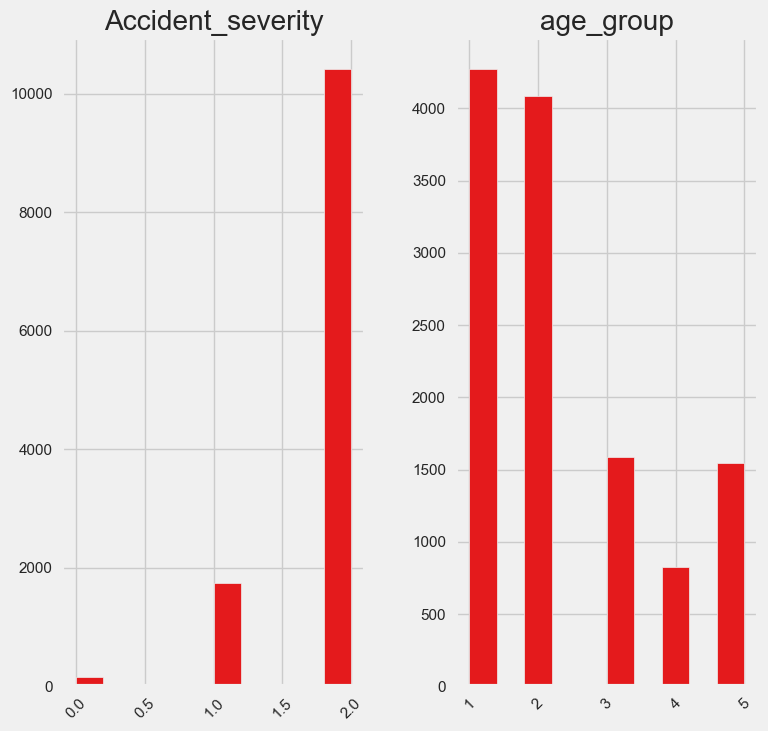

In [23]:
# histogram of all numerical values
df.hist(figsize=(8,8), xrot=45)
plt.show()


AttributeError: Rectangle.set() got an unexpected keyword argument 'columm'

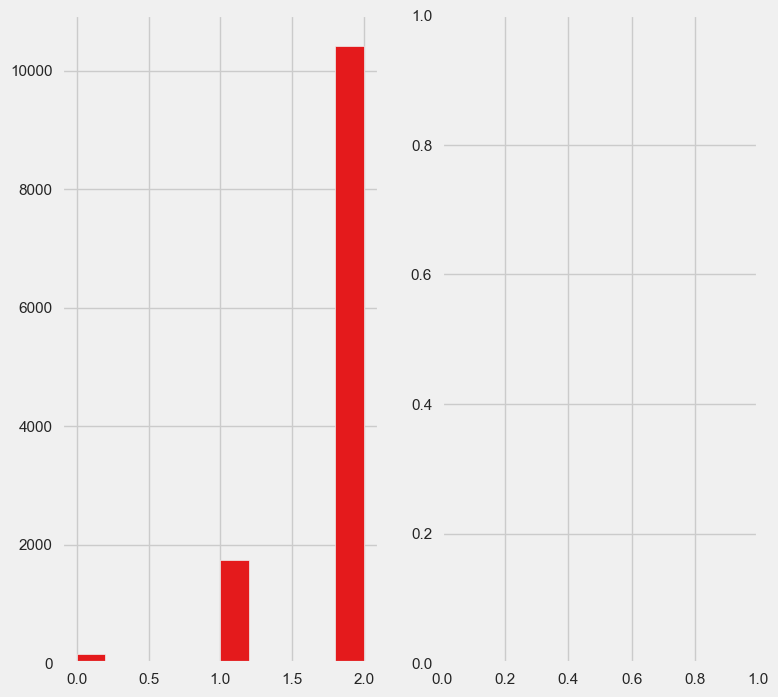

In [24]:
df.hist(columm="Age_band_of_driver",figsize=(8,8), xrot=45)
plt.show()

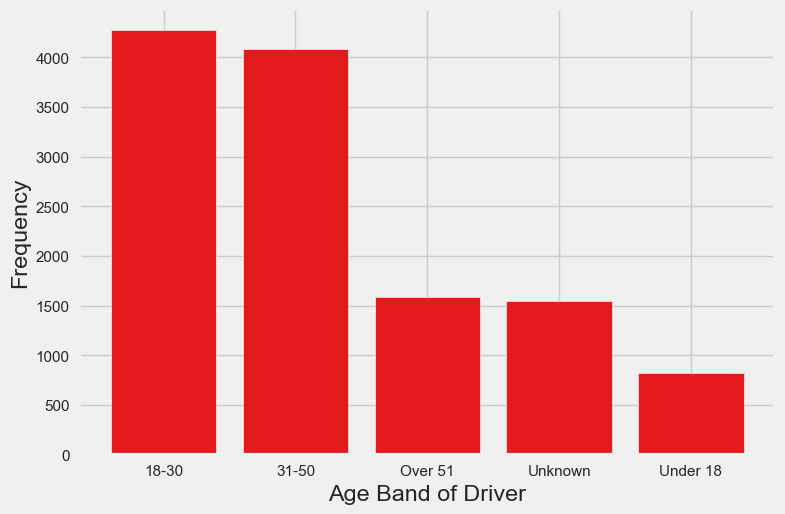

In [25]:
# Get the frequency of each string value in the column
value_counts = df['Age_band_of_driver'].value_counts()

# Create a bar chart of the frequency of each string value
plt.bar(value_counts.index, value_counts.values)

# Set the x-label and y-label
plt.xlabel('Age Band of Driver')
plt.ylabel('Frequency')

# Show the plot
plt.show()

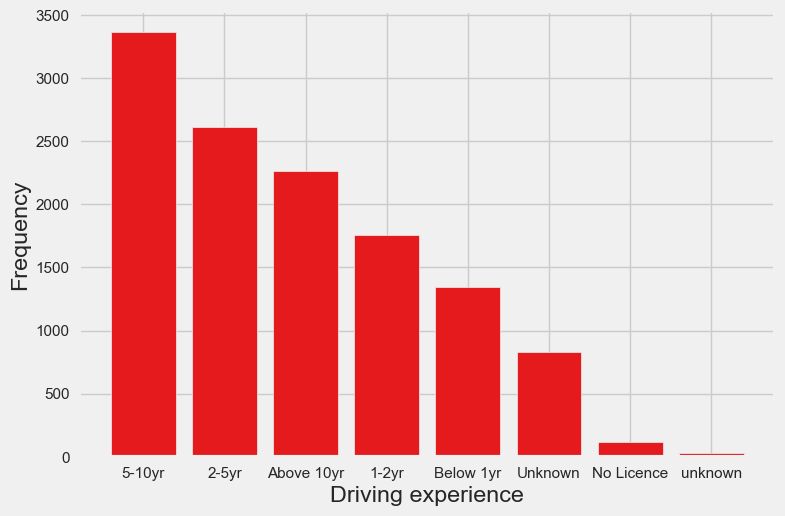

In [26]:
# Get the frequency of each string value in the column
driving_exp_count = df['Driving_experience'].value_counts()

# Create a bar chart of the frequency of each string value
plt.bar(driving_exp_count.index, driving_exp_count.values)

# Set the x-label and y-label
plt.xlabel('Driving experience')
plt.ylabel('Frequency')

# Show the plot
plt.show()

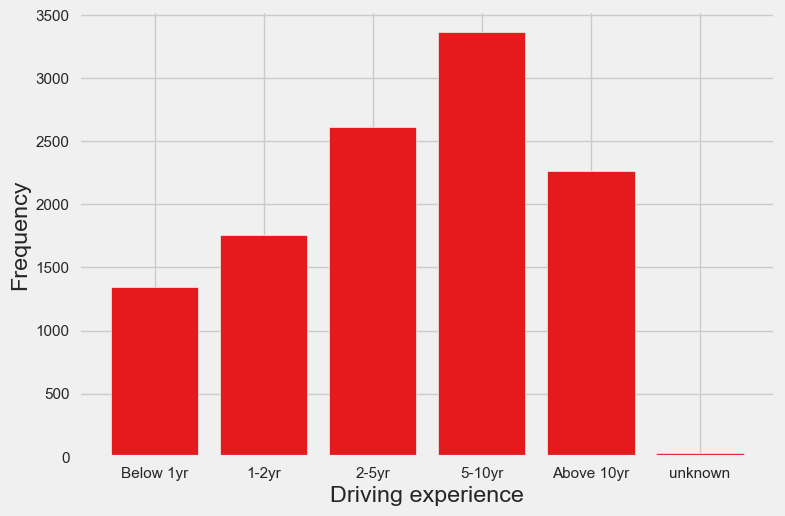

In [27]:
# Get the frequency of each string value in the column and define a custom order
driving_exp_count = df['Driving_experience'].value_counts().reindex(['No License', 'Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr', 'unknown'])

# Create a bar chart of the frequency of each string value
plt.bar(driving_exp_count.index, driving_exp_count.values)

# Set the x-label and y-label
plt.xlabel('Driving experience')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [42]:
"""
# using set to get unique values
unique_lanes_or_medians = set(df['Lanes_or_Medians'])
print(unique_lanes_or_medians)
"""
# using unique() function to get unique values
unique_lanes_or_medians = df['Lanes_or_Medians'].unique()
print(unique_lanes_or_medians)

['Unknown' 'Undivided Two way' 'other' 'Double carriageway (median)'
 'One way' 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)']


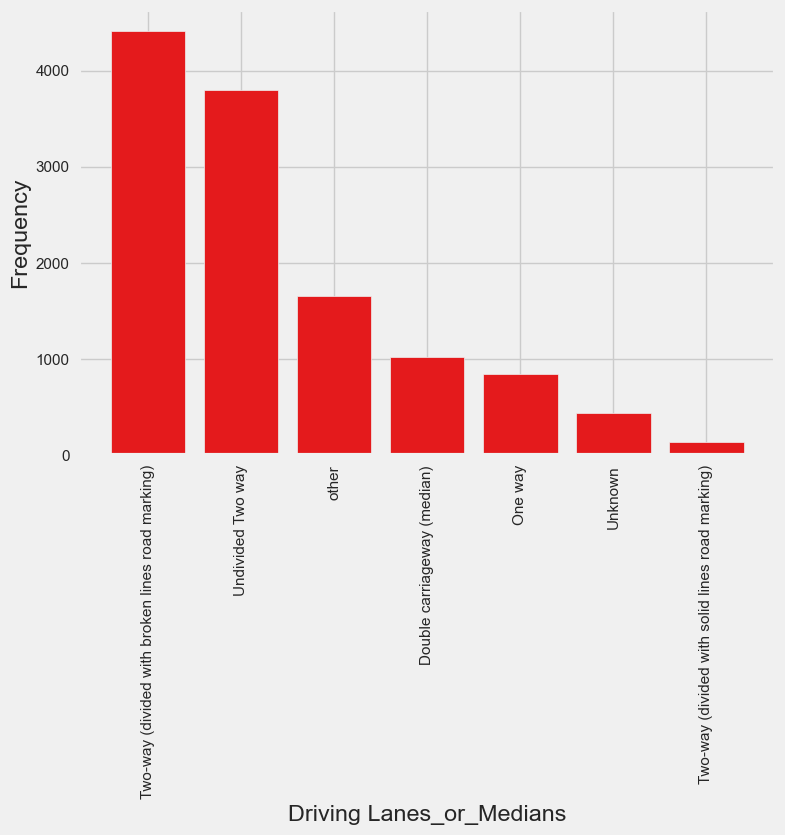

In [33]:
# Get the frequency of each string value in the column and define a custom order
lanes_or_medians_count = df['Lanes_or_Medians'].value_counts()

# Create a bar chart of the frequency of each string value
plt.bar(lanes_or_medians_count.index, lanes_or_medians_count.values)

# Set the x-label and y-label
plt.xlabel('Driving Lanes_or_Medians',)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
# Show the plot
plt.show()

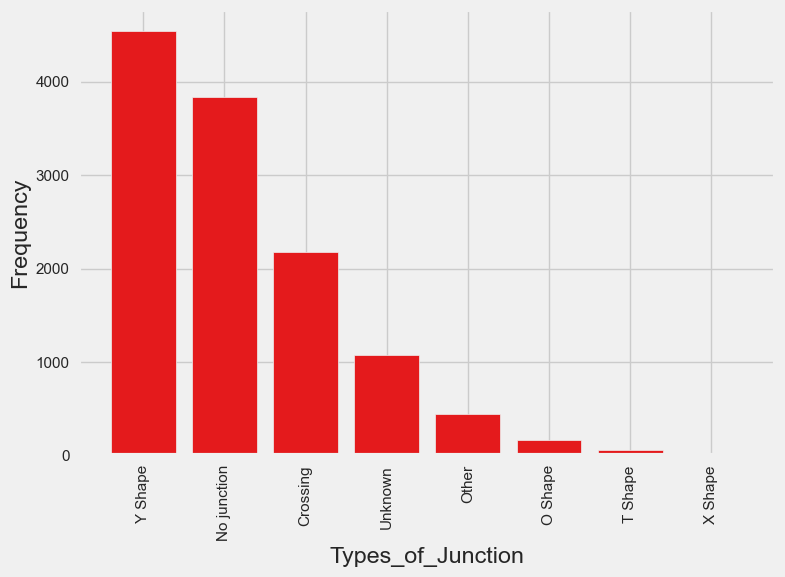

In [35]:
# Get the frequency of each string value in the column and define a custom order
types_of_junction_count = df['Types_of_Junction'].value_counts()

# Create a bar chart of the frequency of each string value
plt.bar(types_of_junction_count.index, types_of_junction_count.values)

# Set the x-label and y-label
plt.xlabel('Types_of_Junction',)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
# Show the plot
plt.show()

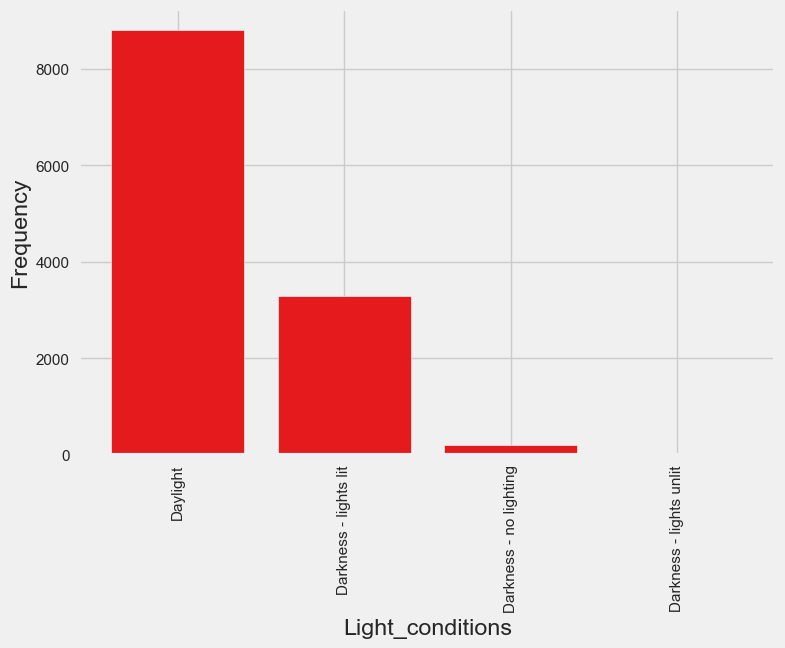

In [36]:
# Get the frequency of each string value in the column and define a custom order
light_conditions_count = df['Light_conditions'].value_counts()

# Create a bar chart of the frequency of each string value
plt.bar(light_conditions_count.index, light_conditions_count.values)

# Set the x-label and y-label
plt.xlabel('Light_conditions',)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
# Show the plot
plt.show()

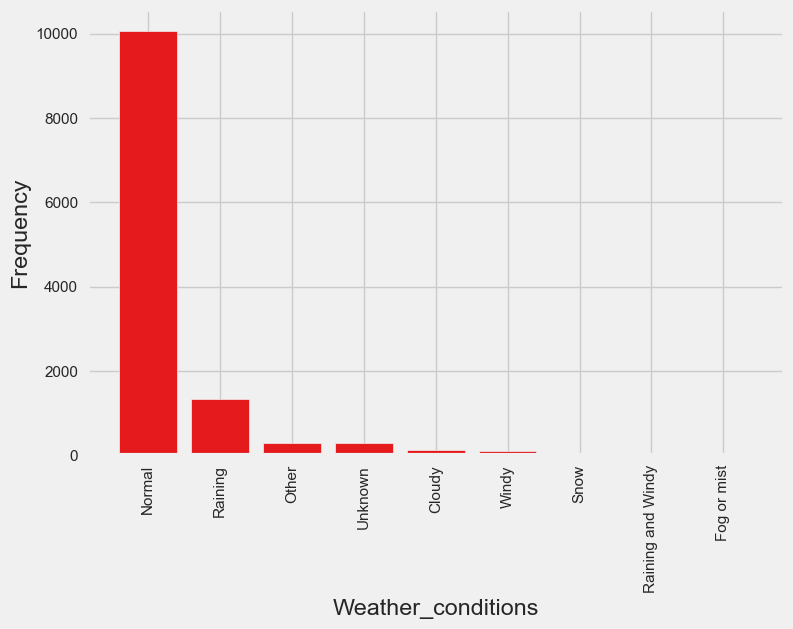

In [37]:
# Get the frequency of each string value in the column and define a custom order
weather_conditions_count = df['Weather_conditions'].value_counts()

# Create a bar chart of the frequency of each string value
plt.bar(weather_conditions_count.index, weather_conditions_count.values)

# Set the x-label and y-label
plt.xlabel('Weather_conditions',)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
# Show the plot
plt.show()

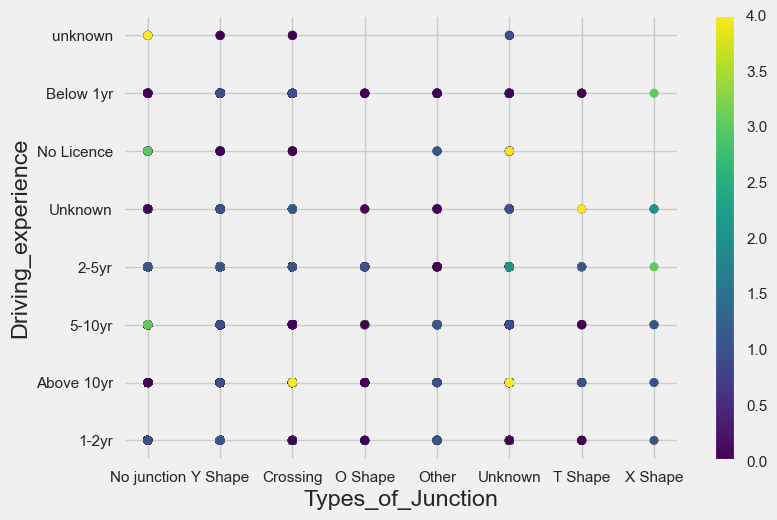

In [48]:
# this is not useful

# Create a scatter plot of the data with color-coded points
plt.scatter(x=df["Types_of_Junction"], y=df["Driving_experience"], c=df["age_group"], cmap='viridis')   #cmap = jet, cool, hot, rainbow 

# Set the x-label and y-label
plt.xlabel('Types_of_Junction')
plt.ylabel('Driving_experience')

plt.colorbar()

# Show the plot
plt.show()

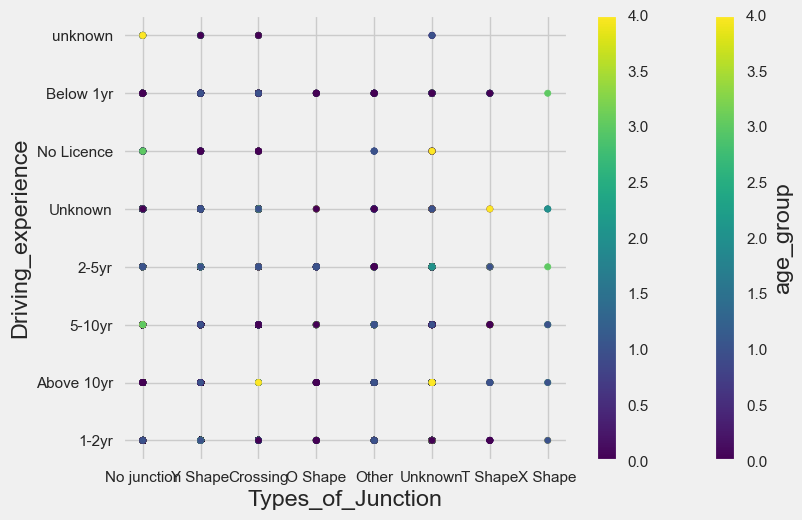

In [52]:
scatter_plot = df.plot.scatter(x='Types_of_Junction', y='Driving_experience', c='age_group', cmap='viridis')

# Set the x-label and y-label
scatter_plot.set_xlabel('Types_of_Junction')
scatter_plot.set_ylabel('Driving_experience')

# Add a color bar legend
plt.colorbar(scatter_plot.collections[0])

# Show the plot
plt.show()

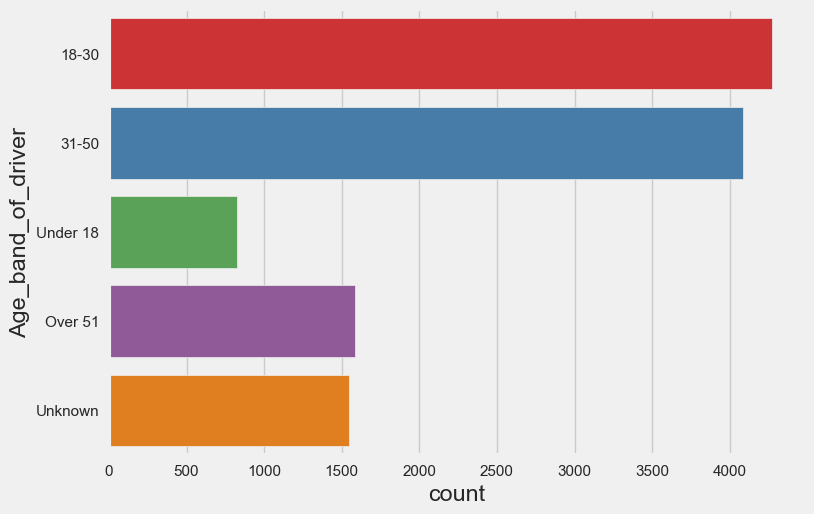

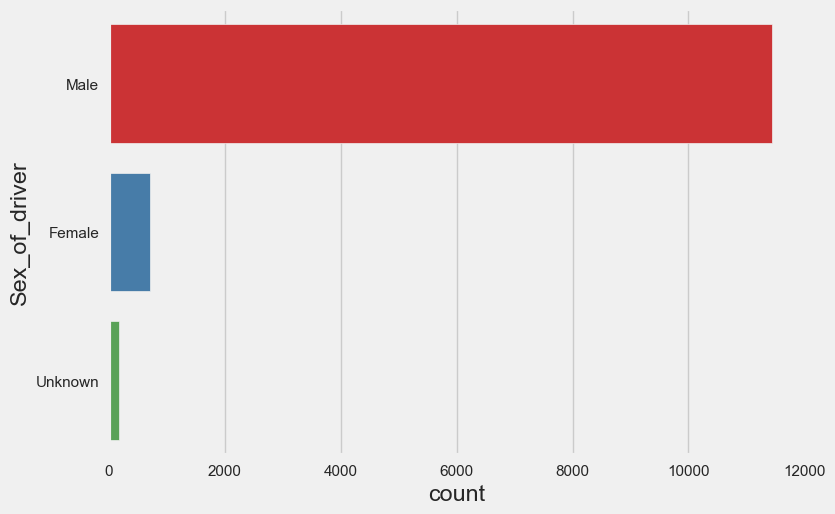

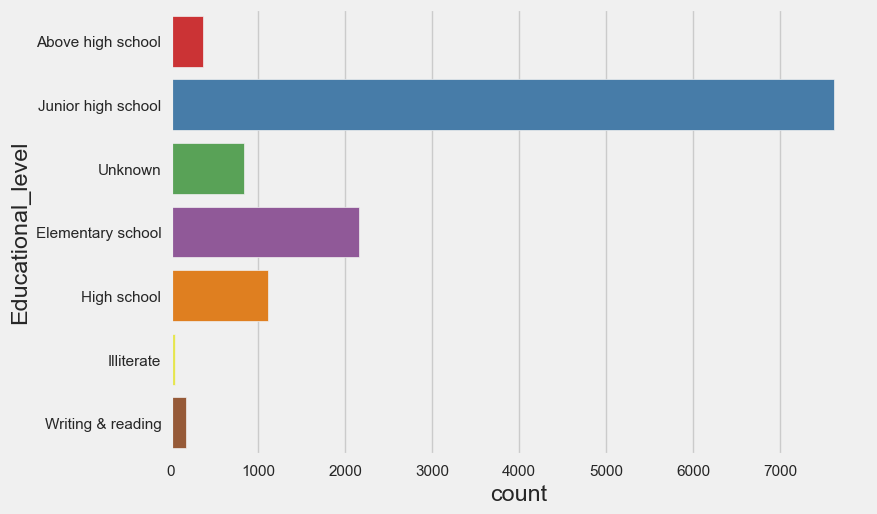

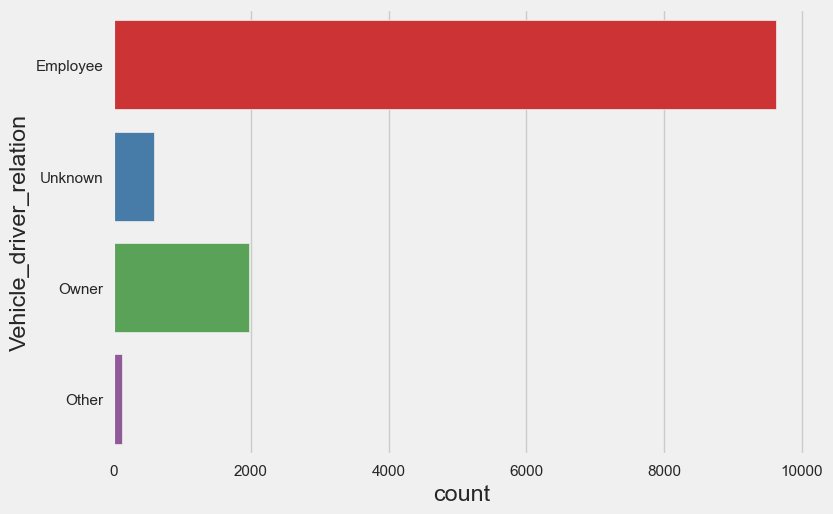

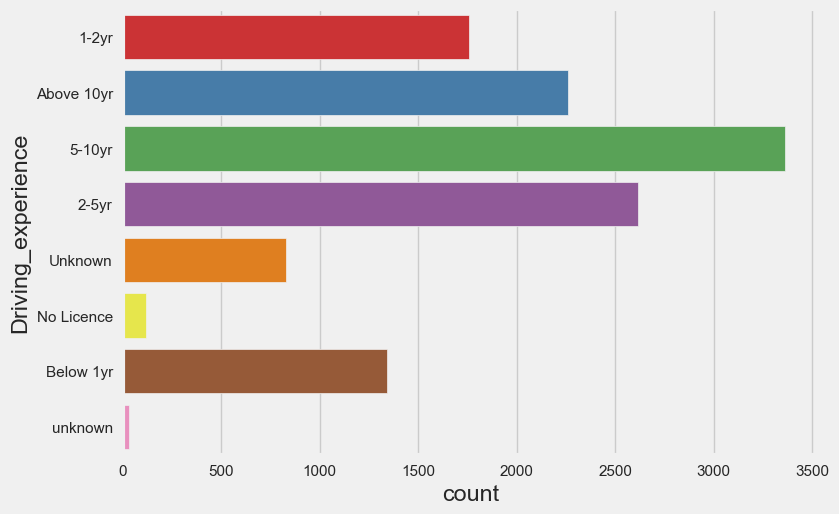

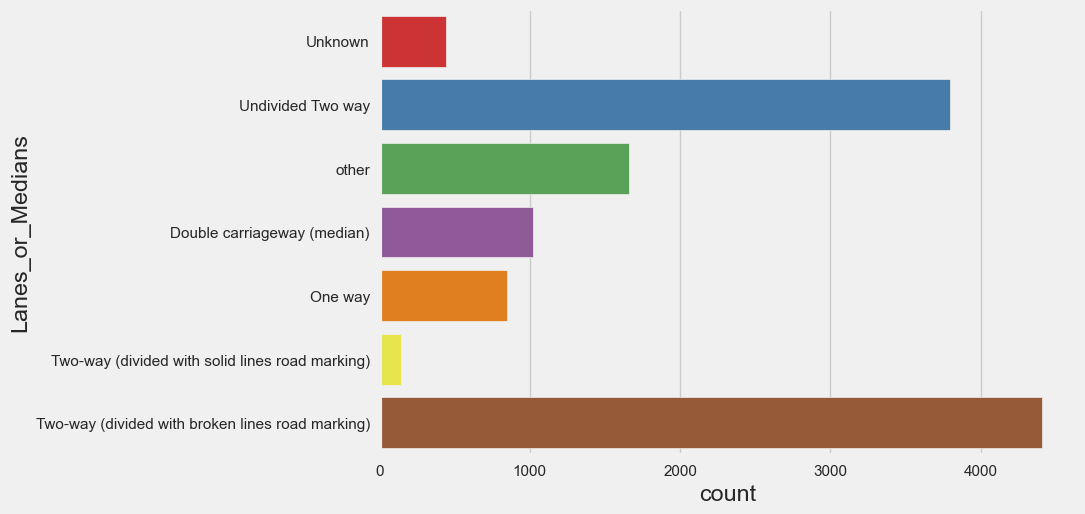

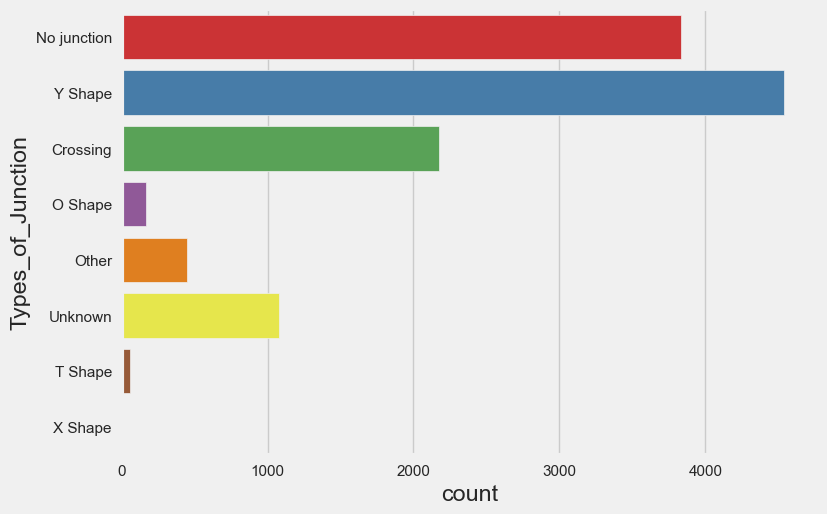

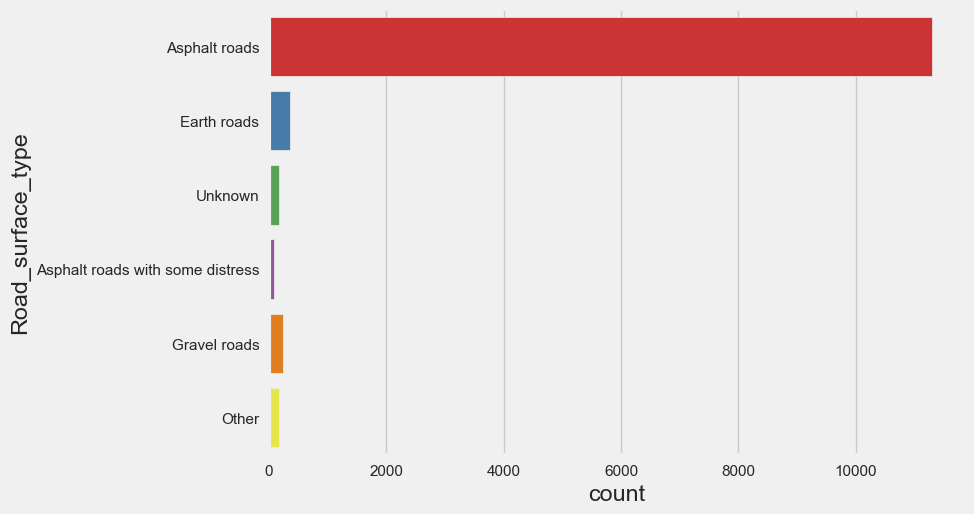

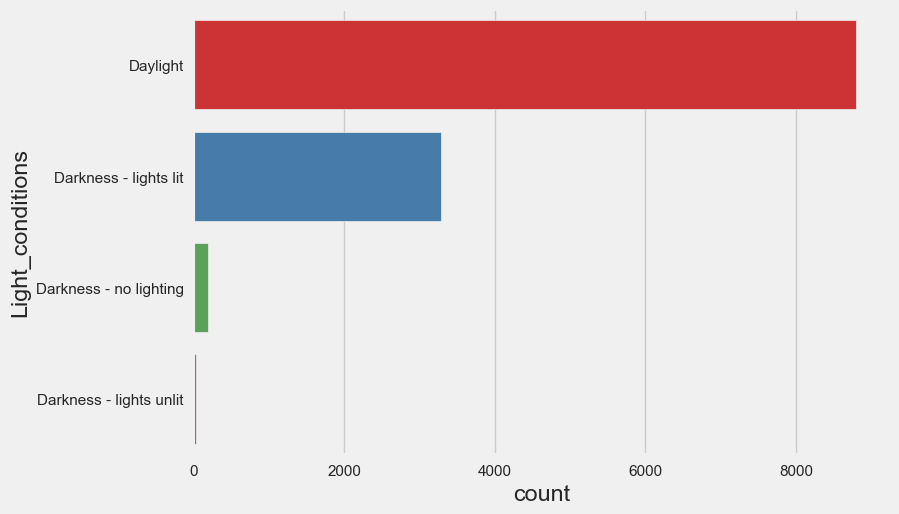

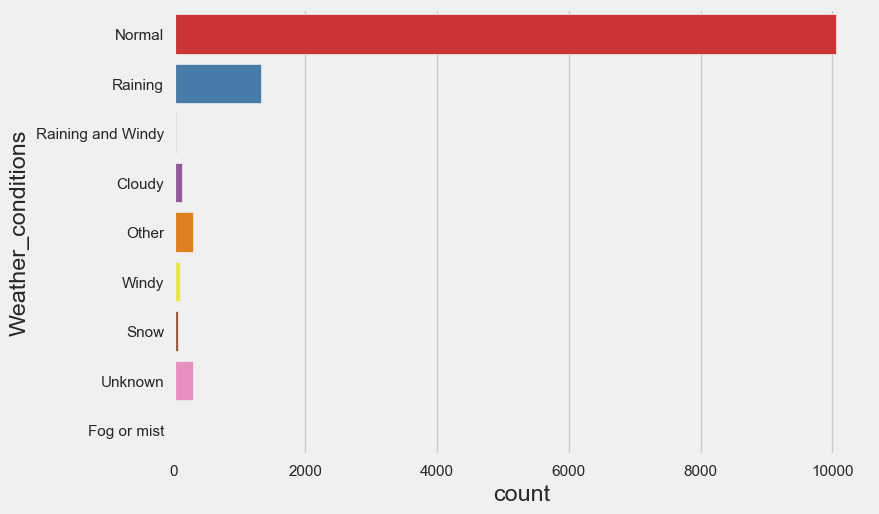

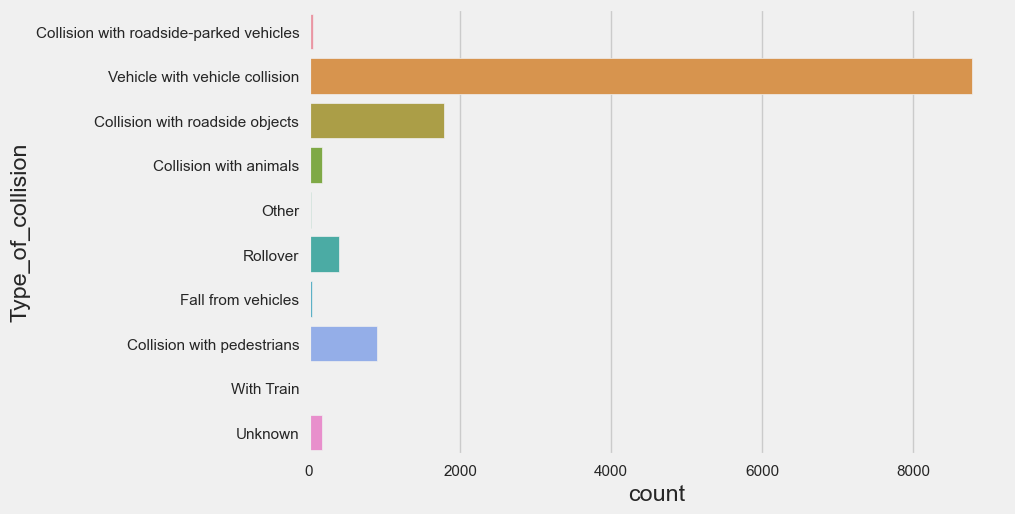

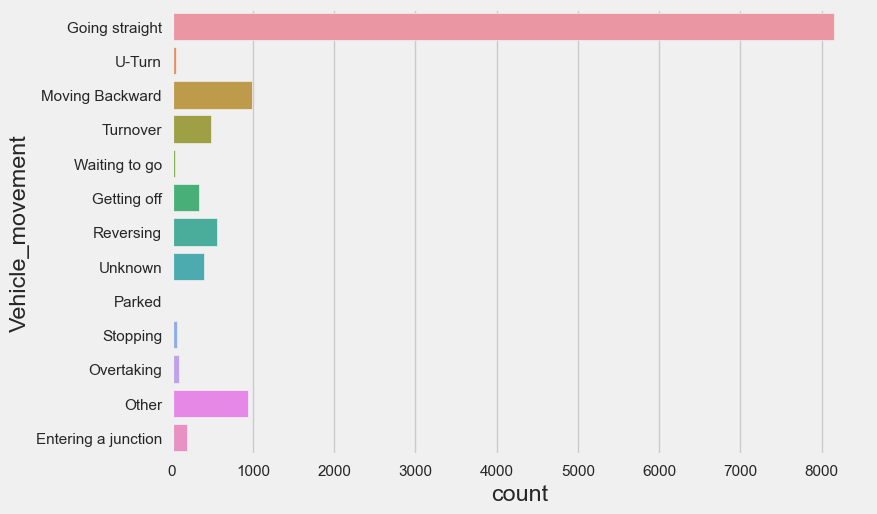

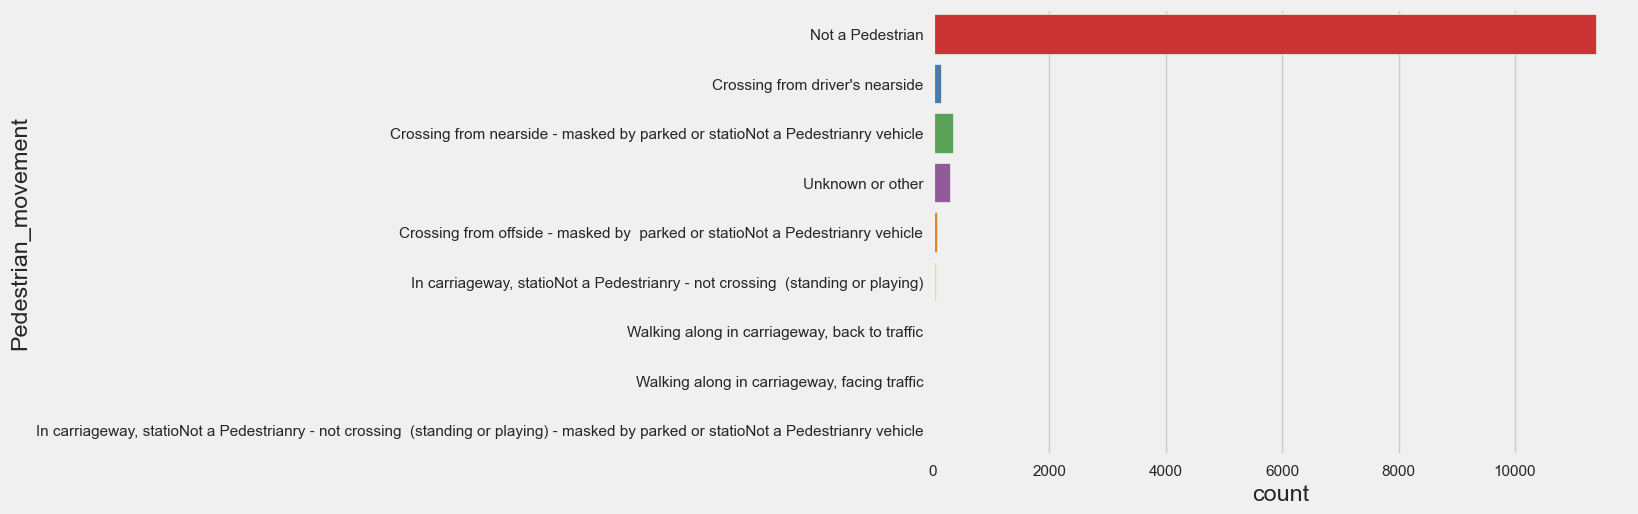

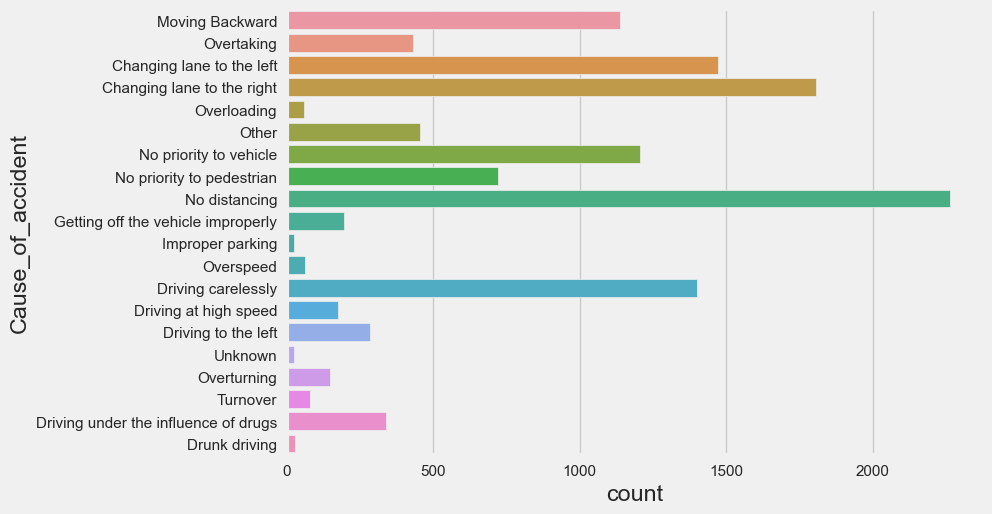

In [55]:
# SEABORN LIBRARY
# countplot
for col in df.select_dtypes(include='object'):
    # choose the columns that have <= 10 unique values
    if df[col].nunique() <= 10:
        sns.countplot(y=col, data=df)
        plt.show()

In [3]:
"""
INSIGHTS
========

1. Age group:
- Most people are in the age groups 18-30 and 31-50. This could be because that's the age group with most no. of drivers
- 19-30 and 31-50 have almost same no. of accidents

2. Sex:
- Most people are in Male. This could be because there are more male drivers than female drivers.

3. Educational level:
- Most are Junior high school pass.

4. Vehicle driver relation:
- More accidents are caused by the employees than the owners. Employees do not care much about their car and drive recklessly. (Based on assumption that there are more owners driving cars than employees and yet more accidents are caused by employees)

5. Driving experience:
- Most accidents are caused by the people with 5-10 years of driving experience.   	- Case 1: there are more drivers with 5-10 years experience, so it doesn't really say much about
	- Case 2: Drivers with 5-10 years of experience are over confident are drive recklessly

6. Lanes or Medians: - best factor
- 2-way (divided with broken lines road marking) has highest no. of accidents while 2-way (divided with solid lines road marking) has very low.
	- this is mostly caused by the drivers trying to overtake which is quite risky.
- Undivided 2 ways have 2nd highest no. of accidents. Accidents probably coz of the same reason as above.

7. Types of Junction
- Y-shape Junctions have the highest no. of accidents. Drivers going to opposite sides might hit each other.
- No Junctions have 2nd higest no. of accidents. From another graphs it was seen that most accidents are caused due to no distance between the vehicles. These are are mostly related.

8. Road surface type
- Asphalt roads have the highest no. of accidents. This is mostly because the no. of Asphalt roads is also the higest and have more vehicles using them.

9. Light conditions
- Daylight have the highest no. of accidents. This is mostly because the no. of vehicles on the road are more during the day.

10. Weather conditions
- Normal days have the highest no. of accidents. This is mostly because the no. of normal days are more.

11. Type of collision - 2nd most important parameter
- Vehicle-Vehicle collisions are the highest. On the road, a vehicle is the nearest thing to another vehicle, also since the other vehicle is also moving at a high speed, they are unpredictable. So, accidents caused can be due to another driver's mistake or both the drivers' mistake. Also, since the roadside objects and roadside-parked objects are not moving, they are predictable, and there's less chances of hitting them.    	

12. Vehicle movement
- Most accidents have been caused when the vehicle was going straight. 
	- These could be cause of less distance between vehicles and junctions/crossings.
	- Drivers drive fast when driving straight

13. Cause of accident
- Most accidents are caused while changing lanes. 
	- Changing lanes to right cause more accidents than changing lanes to left. Which side do the vehicles drive in the city of dataset?
- 2nd most accidents are caused dut to no distancing between vehicles.



OTHER NOTES:
1. Scatter plots are useless for this(categorical) type of data
2. Autoviz library shows the graphs with average values. When is that library useful? Dur to average values, everything seemed almost equal
3. Use Seaborn library when you want to get the count of all the unique values of each columns
4. What types of graphs are best for what type of data?
5. Check relation between 2 columns

"""

"\nINSIGHTS\n========\n\n1. Age group:\n- Most people are in the age groups 18-30 and 31-50. This could be because that's the age group with most no. of drivers\n- 19-30 and 31-50 have almost same no. of accidents\n\n2. Sex:\n- Most people are in Male. This could be because there are more male drivers than female drivers.\n\n3. Educational level:\n- Most are Junior high school pass.\n\n4. Vehicle driver relation:\n- More accidents are caused by the employees than the owners. Employees do not care much about their car and drive recklessly. (Based on assumption that there are more owners driving cars than employees and yet more accidents are caused by employees)\n\n5. Driving experience:\n- Most accidents are caused by the people with 5-10 years of driving experience.   \t- Case 1: there are more drivers with 5-10 years experience, so it doesn't really say much about\n\t- Case 2: Drivers with 5-10 years of experience are over confident are drive recklessly\n\n6. Lanes or Medians: - best 